In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
import numpy as np

In [63]:
file1=pd.read_csv('act107_regression_data1.csv')

In [64]:
file1.head()

,HV1,IC1,IC2,IC3,IC4,IC5,AVGGIFT,TARGET_D
0,2346,420,446,468,503,14552,15.500000,21.0
1,497,350,364,357,384,11696,3.080000,3.0
2,1229,469,502,507,544,17313,7.500000,20.0
3,325,148,181,171,209,6334,6.700000,5.0
4,768,174,201,220,249,7802,8.785714,10.0


In [65]:
file1.describe()


,HV1,IC1,IC2,IC3,IC4,IC5,AVGGIFT,TARGET_D
count,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000
mean,1163.701425,352.831922,401.913690,400.962214,446.035102,16483.862482,11.836754,15.624344
std,1032.104682,171.357547,182.660078,166.681913,176.689128,9499.090544,10.147951,12.445137
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.260870,1.000000
25%,548.000000,239.000000,283.000000,287.000000,325.000000,11164.000000,7.181818,10.000000
50%,809.000000,318.000000,366.000000,366.000000,411.000000,14377.000000,10.000000,13.000000
75%,1367.500000,427.000000,481.000000,482.500000,531.500000,18819.500000,14.500000,20.000000
max,5982.000000,1500.000000,1500.000000,1394.000000,1394.000000,174523.000000,450.000000,200.000000


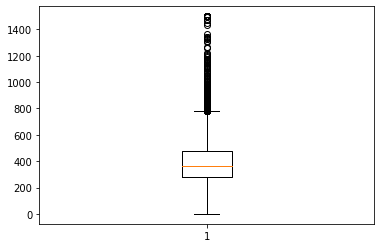

In [66]:
plt.boxplot(file1['IC2'])
plt.show()

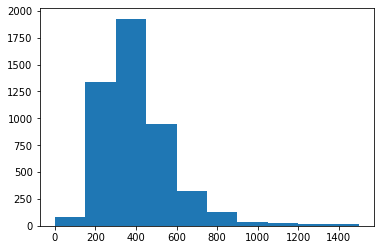

In [67]:
plt.hist(file1['IC2'])
plt.show()

In [68]:
file1['IC2'].describe()

count    4843.000000
mean      401.913690
std       182.660078
min         0.000000
25%       283.000000
50%       366.000000
75%       481.000000
max      1500.000000
Name: IC2, dtype: float64

In [69]:
iqr = np.percentile(file1['IC2'],75) - np.percentile(file1['IC2'],25)
upper_limit = np.percentile(file1['IC2'],75) + 1.5*iqr
lower_limit = np.percentile(file1['IC2'],25) - 1.5*iqr

In [70]:
file1 = file1[(file1['IC2']>lower_limit) & (file1['IC2']<upper_limit)]

In [71]:
file1.head()


,HV1,IC1,IC2,IC3,IC4,IC5,AVGGIFT,TARGET_D
0,2346,420,446,468,503,14552,15.500000,21.0
1,497,350,364,357,384,11696,3.080000,3.0
2,1229,469,502,507,544,17313,7.500000,20.0
3,325,148,181,171,209,6334,6.700000,5.0
4,768,174,201,220,249,7802,8.785714,10.0


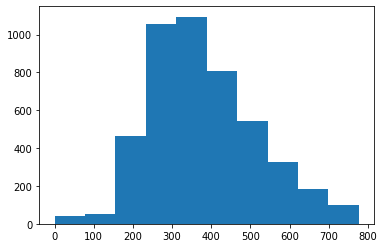

In [72]:
plt.hist(file1['IC2'])
plt.show()

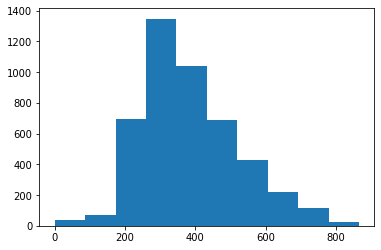

In [73]:
plt.hist(file1['IC3'])
plt.show()

<ipython-input-82-3425f7b364ff>:2: RuntimeWarning: divide by zero encountered in log
  x = np.log(x)
c:\users\lorenzo\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


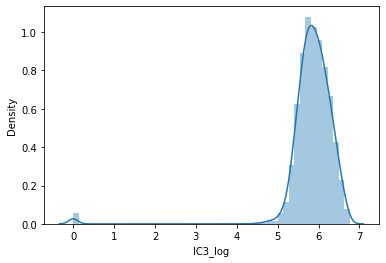

In [82]:
def log_transfom_clean(x):
    x = np.log(x)
    if np.isfinite(x):
        return x
    else:
        return 0
    
file1['IC3_log'] = list(map(log_transfom_clean, file1['IC3']))
sns.distplot(file1['IC3_log'])
plt.show()

In [83]:
iqr2 = np.percentile(file1['IC3_log'],75) - np.percentile(file1['IC3_log'],25)
upper_limit = np.percentile(file1['IC3_log'],75) + 1.5*iqr2
lower_limit = np.percentile(file1['IC3_log'],25) - 1.5*iqr2

In [84]:
file1['IC3_log'] = file1['IC3_log'].fillna(np.mean(file1['IC3_log']))

In [86]:
file1 = file1[(file1['IC3_log']>lower_limit) & (file1['IC3_log']<upper_limit)]

c:\users\lorenzo\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


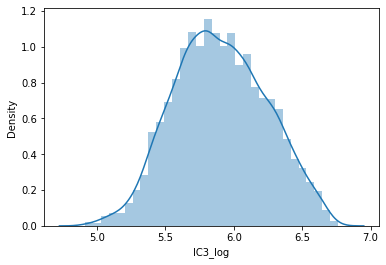

In [87]:
sns.distplot(file1['IC3_log'])
plt.show()

In [ ]:
#box cox

c:\users\lorenzo\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


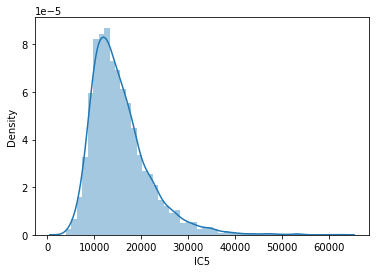

In [90]:
sns.distplot(file1['IC5'])
plt.show()

In [98]:
file1[file1['IC5'] <= 0]



,HV1,IC1,IC2,IC3,IC4,IC5,AVGGIFT,TARGET_D,IC3_log


In [88]:
from scipy import stats

In [99]:
xt, lmbda = stats.boxcox(file1['IC5'])

In [101]:
lmbda

-0.1869177640161044

c:\users\lorenzo\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


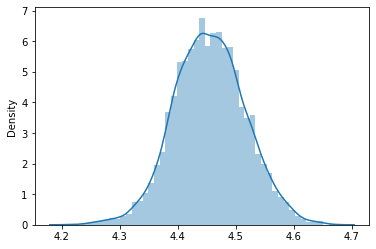

In [100]:
sns.distplot(xt)
plt.show()

In [103]:
data3=file1.iloc[:,0:3]

c:\users\lorenzo\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


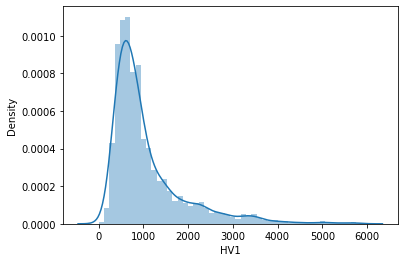

c:\users\lorenzo\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


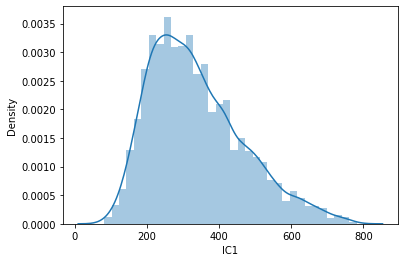

c:\users\lorenzo\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


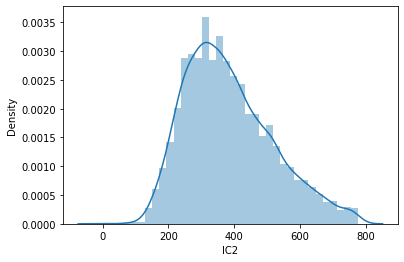

In [105]:
for val in data3.columns:
    sns.distplot(data3[val])
    plt.show()

In [107]:
from sklearn.preprocessing import Normalizer
transformer = Normalizer().fit(data3)
x_normalized = transformer.transform(data3)
print(x_normalized.shape)
data_norm=pd.DataFrame(x_normalized)

(4609, 3)


c:\users\lorenzo\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


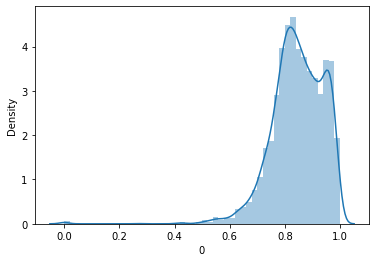

c:\users\lorenzo\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


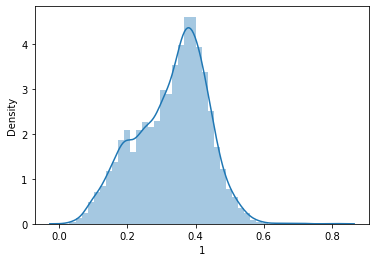

c:\users\lorenzo\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


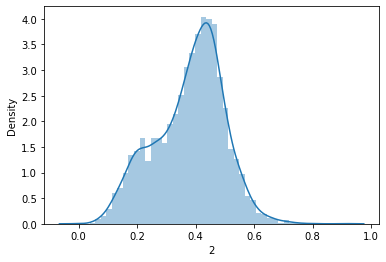

In [108]:
for val in data_norm.columns:
    sns.distplot(data_norm[val])
    plt.show()